In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("customstyle")
import sys
sys.path.append("../modules")
import PBD_analog
import matplotlib as mpl

with open("C:/Users/pveron/colors/palette1.txt", "r") as f:
    colors = f.read().splitlines()
with open("C:/Users/pveron/colors/ratp.txt", "r") as f:
    palette = f.read().splitlines()

labels = dict(l1 = "\\lambda_1", l2 = "\\lambda_2", l3 = "\\lambda_3",
              m1 = "\\mu_1", m2 = "\\mu_2")
long_labels = dict(l1 = "Initiation rate from good", l2 = "Completion rate", l3 = "Initiation rate from incipient",
              m1 = "Extinction rate of good", m2 = "Extinction rate of incipient")

In [24]:
par_default = {'l1': 0.3, 'l2': 0.4, 'l3': 0.3, 'm1': 0.1, 'm2': 0.1}
solver_kwargs = dict(atol = 1e-9, rtol = 1e-12)


var1 = 'l2'
var2 = 'l1'

val1 = [0.1, 0.3, 0.5, 0.7, 0.9]
val2 = [0.1, 0.3, 0.6, 1.3]

T = np.linspace(0,20,500)

Rates = np.zeros((len(val1), len(val2), len(T), 2))

for i1, x1 in enumerate(val1):
    for i2, x2 in enumerate(val2):
        par = par_default.copy()
        par[var1] = x1
        par[var2] = x2

        l,m = PBD_analog.PBD_to_time_dep_BD(T, **par, solver_kwargs=solver_kwargs)

        Rates[i1, i2, :, 0] = l
        Rates[i1, i2, :, 1] = m

c:\Users\pveron\Documents\GitHub\PBD_analog\1-rates_analysis\../modules\PBD_analog.py:140: RuntimeWarning: invalid value encountered in sqrt
  pIE =  1/b * np.sqrt(num/den - 0.5*(l*(k-l) + 2*a*b))
c:\Users\pveron\Documents\GitHub\PBD_analog\1-rates_analysis\../modules\PBD_analog.py:234: RuntimeWarning: invalid value encountered in true_divide
  a = -np.log(1 - pS - pE) / t
c:\Users\pveron\Documents\GitHub\PBD_analog\1-rates_analysis\../modules\PBD_analog.py:235: RuntimeWarning: invalid value encountered in true_divide
  b = pS / pE


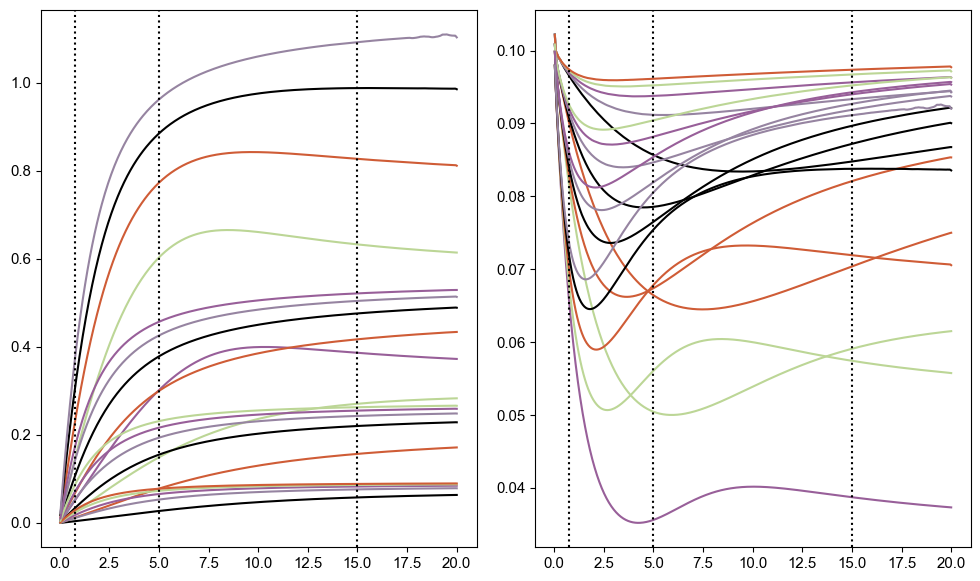

In [25]:
Tsteps = [0.75, 5, 15]

fig, axes = plt.subplots(1, 2, figsize = (10,6))

for i1 in range(len(val1)):
    for i2 in range(len(val2)):
        axes[0].plot(T, Rates[i1, i2, :, 0])
        axes[1].plot(T, Rates[i1, i2, :, 1])

for i in range(2):
    for t in Tsteps:
        axes[i].axvline(t, ls = ":")

In [26]:
Rates_steps = np.zeros((len(val1), len(val2), len(Tsteps), 2))

for i1 in range(len(val1)):
    for i2 in range(len(val2)):
        for iR in (0,1):
            Rates_steps[i1, i2, :, iR] = np.interp(Tsteps, T, Rates[i1, i2, :, iR])        

(0.0, 1.2)

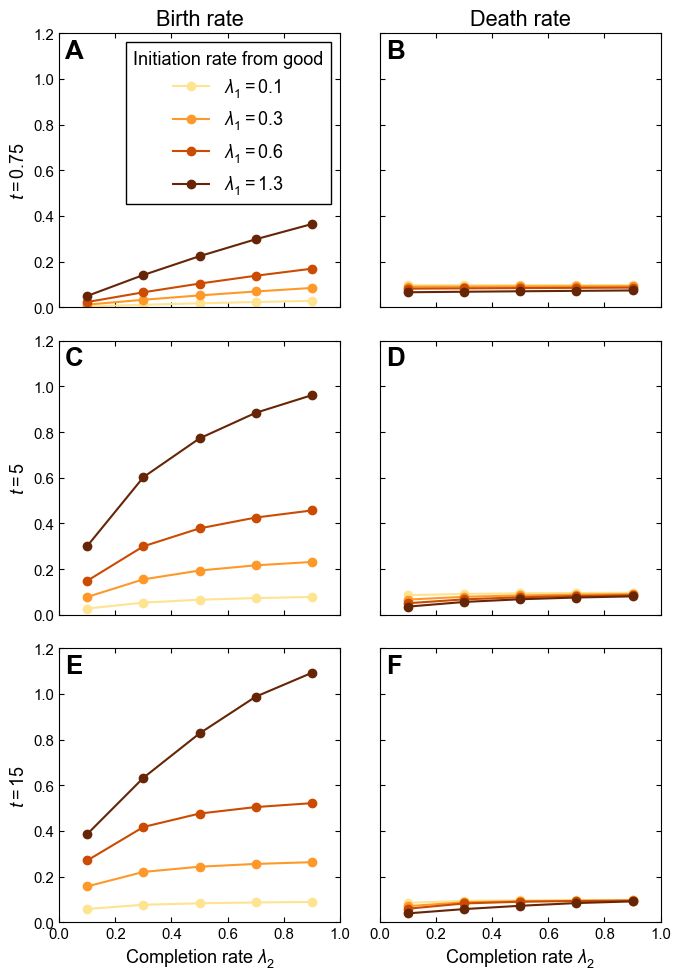

In [31]:
fig, axes = plt.subplots(len(Tsteps), 2, figsize = (7,10), sharex = True, sharey = True)

cmap = mpl.colormaps["YlOrBr"]

panels = (('A', 'B'),('C', 'D'), ('E', 'F'))

for it, t in enumerate(Tsteps):
    for i2, x2 in enumerate(val2):
        for iR in (0,1):
            axes[it, iR].plot(val1, Rates_steps[:, i2, it, iR],  ls = "-", marker = "o", 
                              label = "${}={}$".format(labels[var2], x2),
                              color = cmap((1+i2) / len(val2)))
    axes[it, 0].set_ylabel("$t = {}$".format(t))
for iR in (0,1):
    axes[-1, iR].set_xlabel("{} ${}$".format(long_labels[var1], labels[var1]))
    axes[0, iR].set_title("{} rate".format(["Birth", "Death"][iR]))
    

    for it in range(len(Tsteps)):
        ax = axes[it, iR]
        ax.tick_params(axis = "both", direction = "in")
        ax.yaxis.set_ticks_position('both')
        
        ax.xaxis.set_ticks_position('both')
        ax.text(x = 0.02, y = 0.91, s = panels[it][iR], weight = "bold", 
                size = "x-large", transform = ax.transAxes)

axes[0, 0].legend(title = long_labels[var2])

axes[0, 0].set_xlim(0, 1)
axes[0, 0].set_ylim(0, 1.2)
#axes[0, 1].set_ylim(0,0.1)

C:\Users\pveron\AppData\Local\Temp\ipykernel_3568\3476262252.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0'] + [str(np.round(x,4)) for x in ax.get_xticks()[1:]])
C:\Users\pveron\AppData\Local\Temp\ipykernel_3568\3476262252.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0'] + [str(np.round(y,4)) for y in ax.get_yticks()[1:]])


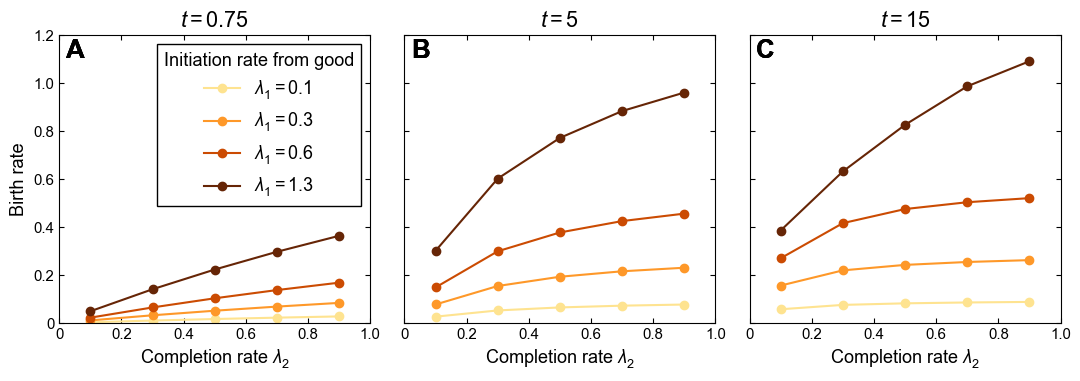

In [50]:
fig, axes = plt.subplots(1, len(Tsteps), figsize = (11,4), sharex = True, sharey = True)

cmap = mpl.colormaps["YlOrBr"]

panels = (('A', 'B', 'C'))

iR = 0 # 0 for birth rate, 1 for death rate 

for it, t in enumerate(Tsteps):
    for i2, x2 in enumerate(val2):
        axes[it].plot(val1, Rates_steps[:, i2, it, iR],  ls = "-", marker = "o", 
                          label = "${}={}$".format(labels[var2], x2),
                          color = cmap((1+i2) / len(val2)))
    axes[it].set_title("$t = {}$".format(t))
    axes[it].set_xlabel("{} ${}$".format(long_labels[var1], labels[var1]))
    

    for it in range(len(Tsteps)):
        ax = axes[it]
        ax.tick_params(axis = "both", direction = "in")
        ax.yaxis.set_ticks_position('both')
        
        ax.xaxis.set_ticks_position('both')
        ax.text(x = 0.02, y = 0.92, s = panels[it], weight = "bold", 
                size = "x-large", transform = ax.transAxes)

axes[0].legend(title = long_labels[var2])

ax.set_xlim(0,1)
ax.set_ylim(0,1.2)
ax.set_xticklabels(['0'] + [str(np.round(x,4)) for x in ax.get_xticks()[1:]])
ax.set_yticklabels(['0'] + [str(np.round(y,4)) for y in ax.get_yticks()[1:]])
axes[0].set_ylabel("Birth rate")
plt.savefig("../fig/birth_rate_with_l1l2.pdf");

C:\Users\pveron\AppData\Local\Temp\ipykernel_3568\483802108.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0'] + [str(np.round(x,4)) for x in ax.get_xticks()[1:]])
C:\Users\pveron\AppData\Local\Temp\ipykernel_3568\483802108.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0'] + [str(np.round(y,4)) for y in ax.get_yticks()[1:]])


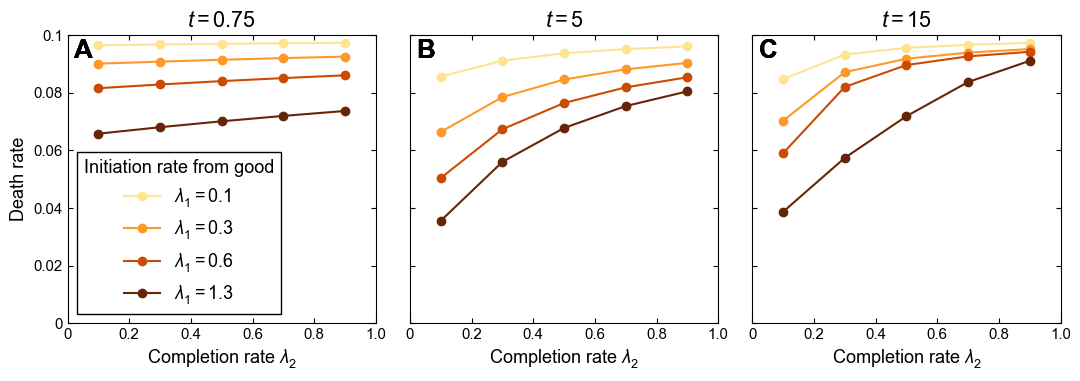

In [52]:
fig, axes = plt.subplots(1, len(Tsteps), figsize = (11,4), sharex = True, sharey = True)

cmap = mpl.colormaps["YlOrBr"]

panels = (('A', 'B', 'C'))

iR = 1 # 0 for birth rate, 1 for death rate 

for it, t in enumerate(Tsteps):
    for i2, x2 in enumerate(val2):
        axes[it].plot(val1, Rates_steps[:, i2, it, iR],  ls = "-", marker = "o", 
                          label = "${}={}$".format(labels[var2], x2),
                          color = cmap((1+i2) / len(val2)))
    axes[it].set_title("$t = {}$".format(t))
    axes[it].set_xlabel("{} ${}$".format(long_labels[var1], labels[var1]))
    

    for it in range(len(Tsteps)):
        ax = axes[it]
        ax.tick_params(axis = "both", direction = "in")
        ax.yaxis.set_ticks_position('both')
        
        ax.xaxis.set_ticks_position('both')
        ax.text(x = 0.02, y = 0.92, s = panels[it], weight = "bold", 
                size = "x-large", transform = ax.transAxes)

axes[0].legend(title = long_labels[var2])

ax.set_xlim(0,1)
ax.set_ylim(0,0.1)
ax.set_xticklabels(['0'] + [str(np.round(x,4)) for x in ax.get_xticks()[1:]])
ax.set_yticklabels(['0'] + [str(np.round(y,4)) for y in ax.get_yticks()[1:]])
axes[0].set_ylabel("Death rate")
plt.savefig("../fig/death_rate_with_l1l2.pdf");

C:\Users\pveron\AppData\Local\Temp\ipykernel_3568\2574129158.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0'] + [str(np.round(x,4)) for x in ax.get_xticks()[1:]])
C:\Users\pveron\AppData\Local\Temp\ipykernel_3568\2574129158.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0'] + [str(np.round(y,4)) for y in ax.get_yticks()[1:]])


Text(0, 0.5, 'Net diversification rate')

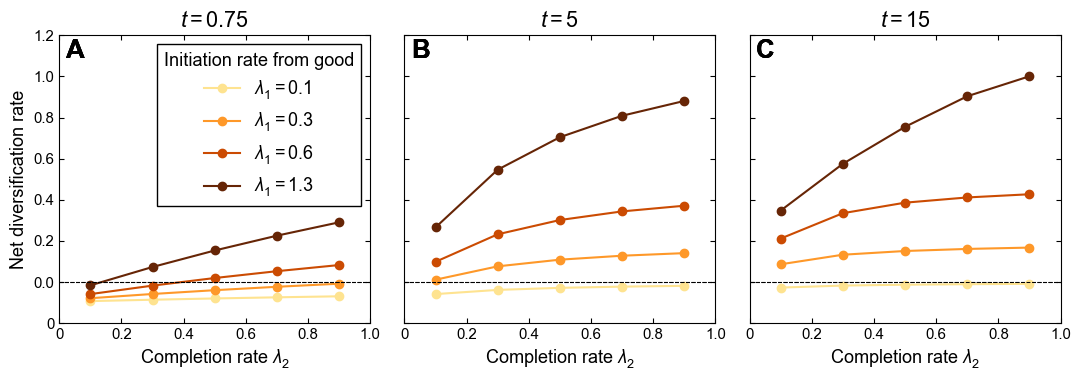

In [65]:
fig, axes = plt.subplots(1, len(Tsteps), figsize = (11,4), sharex = True, sharey = True)

cmap = mpl.colormaps["YlOrBr"]

panels = (('A', 'B', 'C'))


for it, t in enumerate(Tsteps):
    for i2, x2 in enumerate(val2):
        divrate = Rates_steps[:, i2, it, 0] - Rates_steps[:, i2, it, 1]
        axes[it].plot(val1, divrate,  ls = "-", marker = "o", 
                          label = "${}={}$".format(labels[var2], x2),
                          color = cmap((1+i2) / len(val2)))
    axes[it].set_title("$t = {}$".format(t))
    axes[it].set_xlabel("{} ${}$".format(long_labels[var1], labels[var1]))
    

    for it in range(len(Tsteps)):
        ax = axes[it]
        ax.axhline(0, ls = "--", color = "k", lw = 0.75)
        ax.tick_params(axis = "both", direction = "in")
        ax.yaxis.set_ticks_position('both')
        
        ax.xaxis.set_ticks_position('both')
        ax.text(x = 0.02, y = 0.92, s = panels[it], weight = "bold", 
                size = "x-large", transform = ax.transAxes)
        
        

axes[0].legend(title = long_labels[var2])

ax.set_xlim(0,1)
ax.set_ylim(-0.2,1.2)
ax.set_xticklabels(['0'] + [str(np.round(x,4)) for x in ax.get_xticks()[1:]])
ax.set_yticklabels(['0'] + [str(np.round(y,4)) for y in ax.get_yticks()[1:]])
axes[0].set_ylabel("Net diversification rate")
#plt.savefig("../fig/death_rate_with_l1l2.pdf");